In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\GEN AI - PRACTICE\Projects\election2024.csv")

In [3]:
df

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,NaN,NaN,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849


In [4]:
df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [8]:
#null values are more than 50% in job_type and company_type.so its better to drop tham impute with values.
df = df.drop(['job_type','company_type'],axis = 1)

In [9]:
df

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,0.995849


In [10]:
df.isnull().sum()

id                     0
sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
weight1                0
dtype: int64

In [11]:
for col in df.columns:
    print (f"{col} has unique values {df[col].unique()}")

id has unique values ['07169ed8148ce047' '0716a4f3354cecdd' '0716889b304ce79c' ...
 '071690f34d4ce164' '0716bfa9c48ce79a' '07168088318cef88']
sex has unique values ['male' 'female']
age has unique values [18. 23. 20. 22. 21. 27. 37. 43. 39. 36. 49. 60. 44. 61. 67. 29. 47. 32.
 45. 35. 53. 71. 54. 55. 48. 66. 56. 68. 69. 33. 76. 77. 70. 86. 90. 75.
 80. 24. 19. 25. 28. 31. 26. 30. 38. 40. 41. 52. 50. 51. 46. 63. 34. 42.
 65. 73. 74. 72. 59. 57. 58. 78. 79. 62. 64. 82. 84. 85. 87. 83. 81.]
federal_district has unique values ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern']
type_of_city has unique values ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k']
knows_election_date has unique values ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year']
wil

In [12]:
result = df[df['type_of_city'] == 'settlement'].shape[0]
result

81

In [13]:
df.drop('id',axis = 1,inplace = True)

In [14]:
df

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,1.301691
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,1.538628
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,1.270761
1596,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,0.921724
1597,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,1.396691
1598,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,0.995849


<Axes: xlabel='will_vote', ylabel='count'>

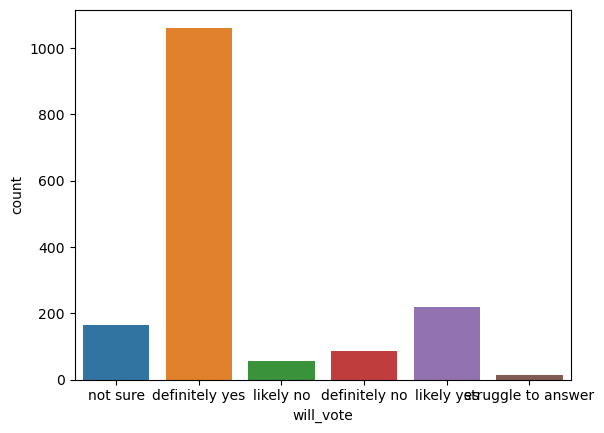

In [15]:
sns.countplot(x = 'will_vote',data = df)

In [16]:
#more no.of people are going to vote tis time.

<Axes: xlabel='sex', ylabel='count'>

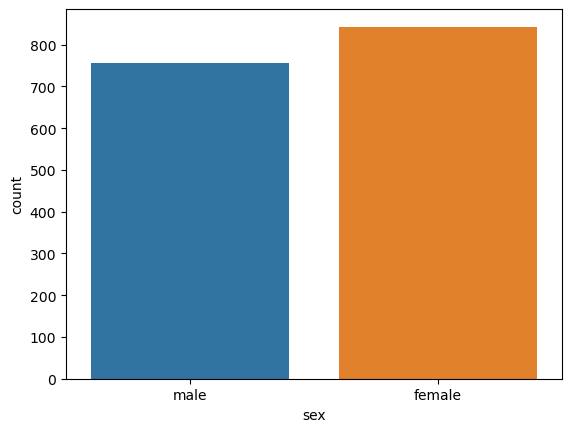

In [17]:
sns.countplot(x = 'sex',data = df)

In [18]:
#almost equal no.of male and female in voters.

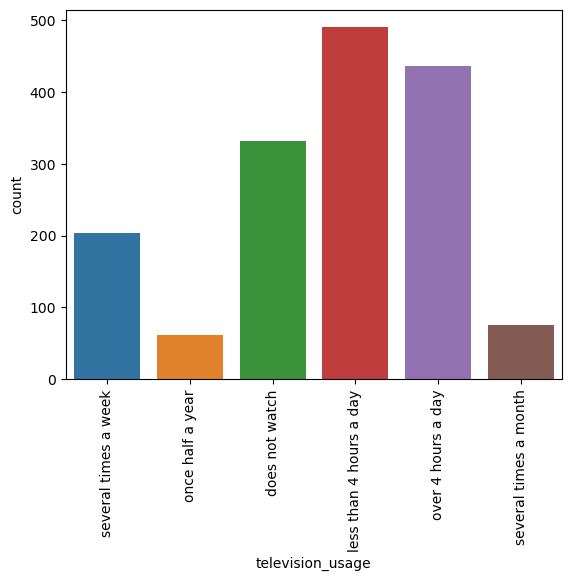

In [19]:
sns.countplot(x = df['television_usage'])
plt.xticks(rotation = 90)
plt.show()

In [20]:
#there are more people watch television less than 4 hours a day.and there are very less people who watch once half a year

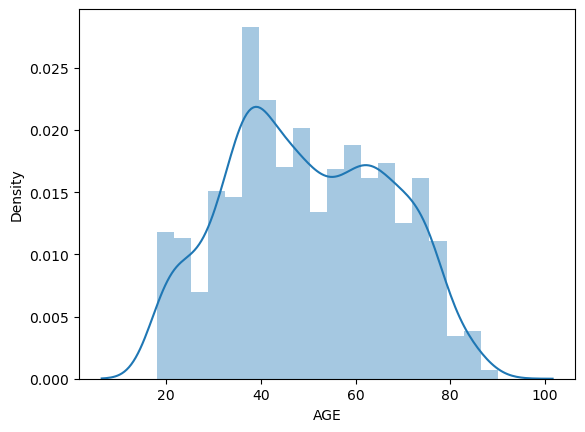

In [21]:
sns.distplot(x = df['age'],bins = 20)
plt.xlabel('AGE')
plt.show()

<Axes: xlabel='weight1', ylabel='Density'>

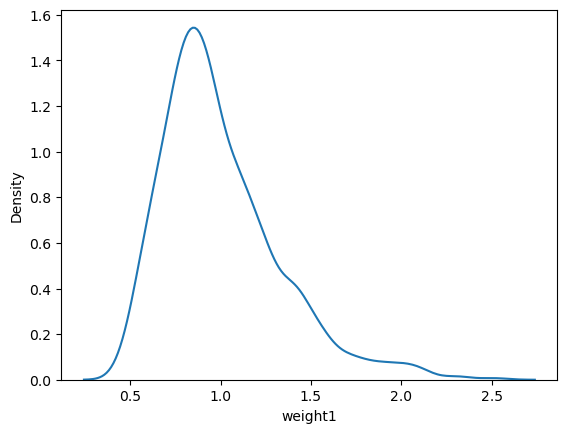

In [22]:
sns.kdeplot(x = df['weight1'],palette = 'coolwarm')

In [23]:
df.columns

Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'weight1'],
      dtype='object')

In [24]:
cols = ['federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate']

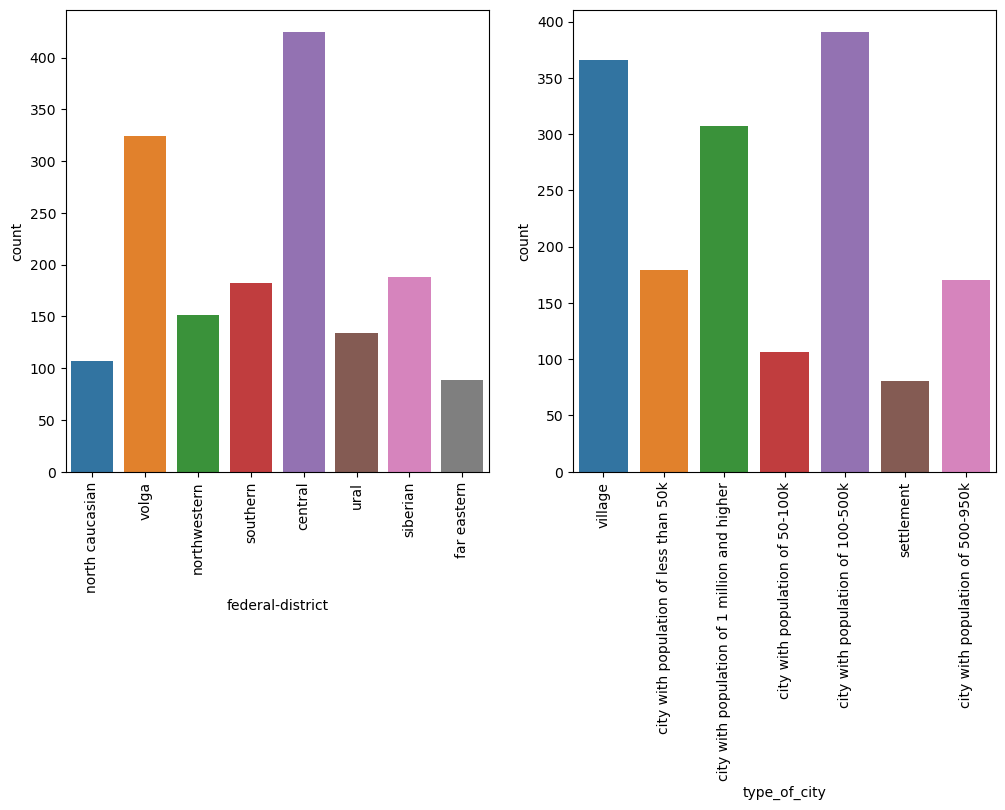

In [25]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.countplot( x = 'federal_district', data = df)
plt.xlabel('federal-district')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot( x = 'type_of_city', data = df)
plt.xlabel('type_of_city')
plt.xticks(rotation = 90)
plt.show()

<Axes: ylabel='count'>

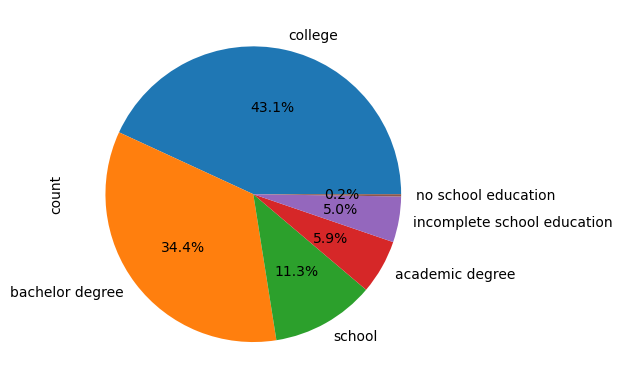

In [26]:
df['education'].value_counts().plot.pie(autopct = "%1.1f%%")

<Axes: ylabel='count'>

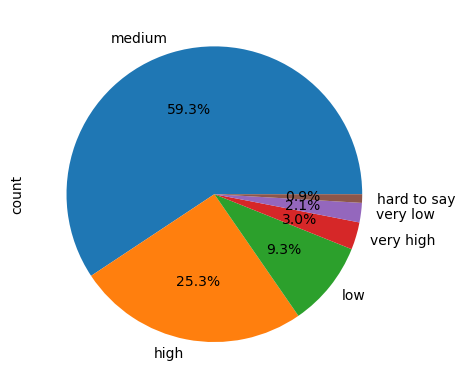

In [27]:
df['income'].value_counts().plot.pie(autopct = "%1.1f%%")

<Axes: ylabel='count'>

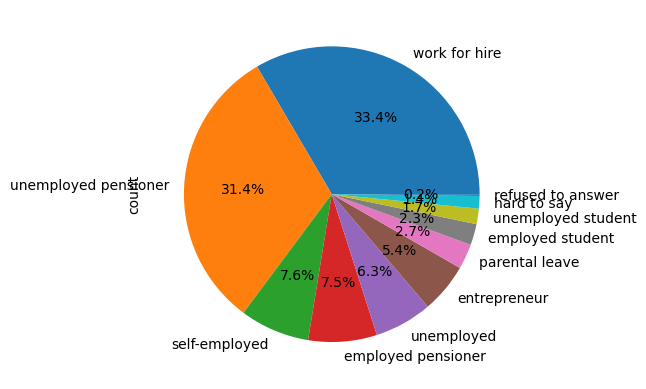

In [28]:
df['employment'].value_counts().plot.pie(autopct = "%1.1f%%")

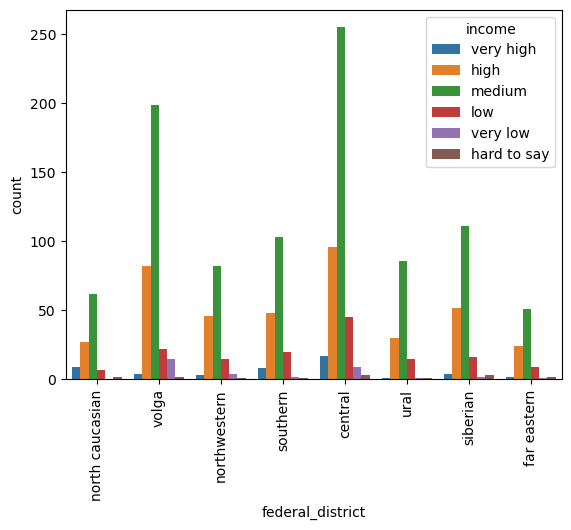

In [53]:
sns.countplot(x = df['federal_district'],hue = df['income'])
plt.xticks(rotation = 90)
plt.show()

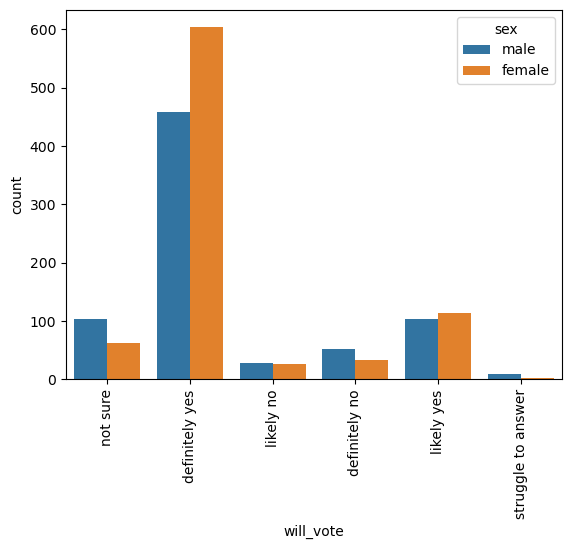

In [54]:
sns.countplot(x = df['will_vote'],hue = df['sex'])
plt.xticks(rotation = 90)
plt.show()

In [55]:
df.corr(numeric_only = True)

,age,weight1
age,1.000000,-0.319715
weight1,-0.319715,1.000000


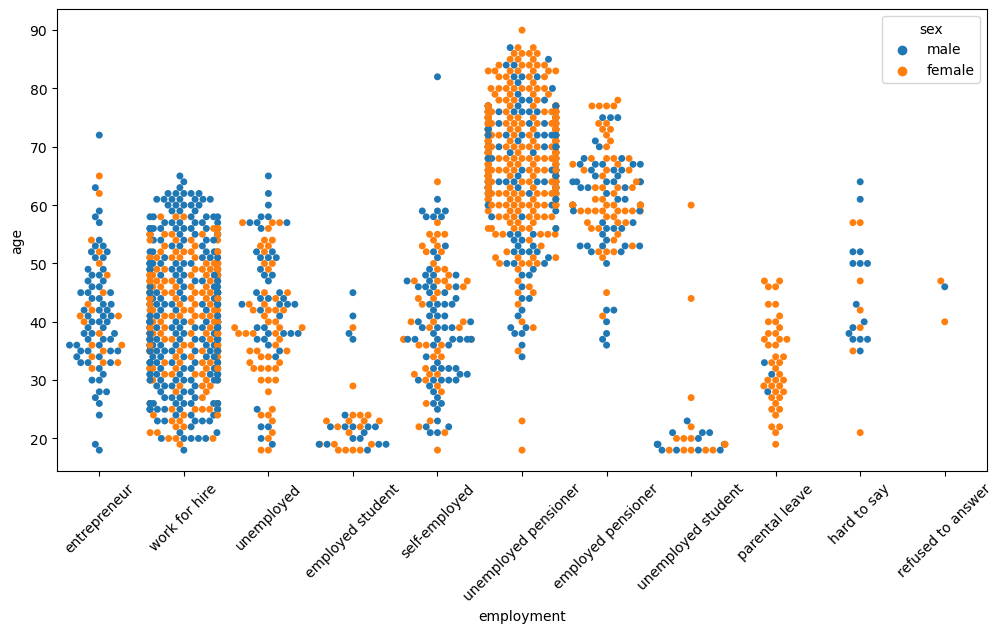

In [56]:
plt.figure(figsize = (12,6))
sns.swarmplot(x = 'employment',y = 'age',hue = 'sex',data = df )
plt.xticks(rotation = 45)
plt.show()

In [57]:
cat_cols = [ col for col in df.columns if df[col].dtype == 'O']

In [58]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in cat_cols:
    df[col] = labelencoder.fit_transform(df[col])

In [59]:
df

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,1,18.0,2,6,0,4,2,5,3,3,4,2,1.445172
1,1,23.0,2,6,0,4,2,2,3,2,4,10,1.445172
2,1,20.0,7,4,0,1,2,5,3,2,4,10,1.301691
3,1,22.0,3,0,2,4,0,5,3,2,4,7,1.538628
4,1,21.0,5,0,0,1,2,0,3,1,4,1,1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1,61.0,0,5,0,0,6,3,1,1,0,8,1.270761
1596,0,80.0,7,6,0,3,5,5,0,2,0,8,0.921724
1597,0,76.0,3,2,0,1,2,0,3,1,0,8,1.396691
1598,0,74.0,0,4,2,1,2,3,3,0,0,0,0.995849


In [60]:
for col in cat_cols:
    df[col] = df[col].astype('int')

In [61]:
df.dtypes

sex                      int32
age                    float64
federal_district         int32
type_of_city             int32
knows_election_date      int32
will_vote                int32
candidate                int32
television_usage         int32
internet_usage           int32
education                int32
income                   int32
employment               int32
weight1                float64
dtype: object

In [62]:
x = df.drop('will_vote',axis = 1)

In [63]:
y = df['will_vote']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 1)

In [66]:
x_train

,sex,age,federal_district,type_of_city,knows_election_date,candidate,television_usage,internet_usage,education,income,employment,weight1
126,0,25.0,0,2,0,2,0,3,1,1,10,1.845052
810,1,52.0,5,3,0,2,3,1,1,3,10,0.820294
635,0,18.0,3,1,0,2,0,1,1,3,8,0.876911
598,0,41.0,7,2,0,2,1,3,1,3,10,1.246380
880,1,54.0,7,1,0,2,5,3,3,3,10,0.664523
...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,31.0,5,6,0,2,2,3,2,3,10,1.394099
905,0,65.0,5,4,2,2,1,3,1,3,8,1.098572
1096,1,41.0,7,5,0,2,1,0,2,3,10,0.712007
235,1,36.0,3,1,1,3,5,3,2,1,10,0.468226


In [67]:
x_test.shape

(480, 12)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()

In [70]:
model.fit(x_train,y_train)

LinearRegression()

In [71]:
y_pred = model.predict(x_test)

In [72]:
y_pred

array([1.6125219 , 1.48301069, 1.64312554, 1.80872098, 1.74673867,
       1.50357379, 1.49533104, 1.56204848, 1.63543545, 1.86665475,
       1.50476131, 1.42956511, 1.42701937, 1.72881883, 1.64525122,
       1.98673276, 1.72725105, 1.73681776, 1.24500633, 1.70978648,
       1.44718611, 1.75305658, 1.75698119, 1.54167692, 1.44651   ,
       1.27956234, 1.52896106, 1.70481191, 1.72508667, 1.24165262,
       1.50965145, 1.85746144, 1.65293012, 1.65769581, 1.74459382,
       1.42436185, 1.86003771, 2.12968425, 1.71734235, 1.7889534 ,
       1.23951039, 1.80284294, 1.57648956, 1.78863127, 1.66277545,
       1.28997125, 1.5506385 , 1.55653747, 1.57997121, 1.47335712,
       1.31965285, 1.39586688, 1.59594221, 1.66240789, 1.54612782,
       2.27588506, 1.37063973, 2.3573297 , 1.84721607, 1.43285232,
       1.46816419, 1.68664359, 1.93065827, 1.66108464, 1.76401345,
       1.66496265, 1.30627067, 1.49653374, 1.9864079 , 1.64966029,
       1.49767221, 1.38203875, 1.63857427, 1.53559024, 2.07525

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [74]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

1.2605045644190964
0.9071970430331329
1.1227219443918857
0.048273636192705305


In [75]:
model.coef_

array([ 0.08941884, -0.01040347, -0.00621938, -0.00414587,  0.11850745,
        0.00953153,  0.02588177, -0.00618051,  0.04633131,  0.01985602,
       -0.01172806, -0.12812383])

In [76]:
model.intercept_

2.0944897006101058

In [77]:
df1 = df.copy()

In [78]:
df1

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,1,18.0,2,6,0,4,2,5,3,3,4,2,1.445172
1,1,23.0,2,6,0,4,2,2,3,2,4,10,1.445172
2,1,20.0,7,4,0,1,2,5,3,2,4,10,1.301691
3,1,22.0,3,0,2,4,0,5,3,2,4,7,1.538628
4,1,21.0,5,0,0,1,2,0,3,1,4,1,1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1,61.0,0,5,0,0,6,3,1,1,0,8,1.270761
1596,0,80.0,7,6,0,3,5,5,0,2,0,8,0.921724
1597,0,76.0,3,2,0,1,2,0,3,1,0,8,1.396691
1598,0,74.0,0,4,2,1,2,3,3,0,0,0,0.995849


In [79]:
df1.corr()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
sex,1.000000,-0.180901,0.036061,-0.085414,0.039637,0.086671,0.096110,-0.003599,0.007141,0.021964,-0.057501,0.000598,-0.128376
age,-0.180901,1.000000,-0.062116,0.106935,-0.154970,-0.164180,-0.090643,0.122916,-0.316436,-0.010465,0.029281,-0.030566,-0.319715
federal_district,0.036061,-0.062116,1.000000,0.062403,-0.020293,0.008158,0.000872,0.031538,-0.006966,0.028709,-0.000012,0.009386,-0.066514
type_of_city,-0.085414,0.106935,0.062403,1.000000,-0.017154,-0.024920,-0.044407,0.127671,-0.076207,0.201739,0.012110,0.086950,-0.004713
knows_election_date,0.039637,-0.154970,-0.020293,-0.017154,1.000000,0.107949,0.065000,-0.018401,0.082639,0.125242,0.033799,-0.026998,0.002190
will_vote,0.086671,-0.164180,0.008158,-0.024920,0.107949,1.000000,0.000256,0.021679,0.072220,0.089406,0.027585,-0.002005,-0.004302
candidate,0.096110,-0.090643,0.000872,-0.044407,0.065000,0.000256,1.000000,-0.068540,0.044636,0.015552,0.013156,0.012372,0.002280
television_usage,-0.003599,0.122916,0.031538,0.127671,-0.018401,0.021679,-0.068540,1.000000,-0.005490,0.096806,0.010400,0.036676,-0.109019
internet_usage,0.007141,-0.316436,-0.006966,-0.076207,0.082639,0.072220,0.044636,-0.005490,1.000000,-0.010955,0.010980,-0.046040,0.107962
education,0.021964,-0.010465,0.028709,0.201739,0.125242,0.089406,0.015552,0.096806,-0.010955,1.000000,0.042093,0.018269,-0.325470


<Axes: >

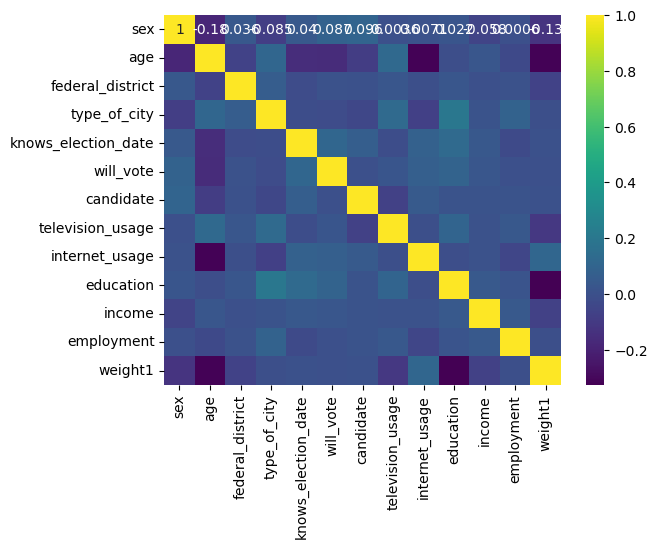

In [80]:
sns.heatmap(df.corr(),annot = True,cmap = "viridis")

In [81]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor

In [82]:
vif = pd.DataFrame()

In [83]:
vif['features'] = df.columns

In [84]:
vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range (len(df.columns))]

In [85]:
vif#vif is very small all features are equally important.

,features,VIF
0,sex,1.901232
1,age,7.274205
2,federal_district,2.585927
3,type_of_city,2.759531
4,knows_election_date,1.219707
5,will_vote,2.933162
6,candidate,4.080778
7,television_usage,2.599428
8,internet_usage,2.822340
9,education,3.539881
